In [6]:
import sys
import matplotlib.animation
print matplotlib.animation.writers.list()
print sys.path

sys.path.insert(0,'/home/jan/cluster/mozaik/')
import numpy
import mozaik
from mozaik.controller import run_workflow, setup_logging
from mozaik.storage.datastore import Hdf5DataStore,PickledDataStore
from parameters import ParameterSet
from mozaik.visualization.plotting import *

from mozaik.analysis.technical import NeuronAnnotationsToPerNeuronValues
from mozaik.tools.mozaik_parametrized import colapse, colapse_to_dictionary, MozaikParametrized
from mozaik.analysis.analysis import *
from mozaik.analysis.vision import *
from mozaik.storage.queries import *
from mozaik.visualization.helper_functions import *

import sys
sys.path.append('/home/antolikjan/remote/cluster_UNIC/dev/pkg/mozaik/mozaik/contrib/')
sys.path.append('/home/antolikjan/remote/cluster_UNIC/dev/pkg/mozaik/mozaik/contrib/New')
from analysis_and_visualization import perform_analysis_and_visualization
%matplotlib inline

setup_logging()

data_store = PickledDataStore(load=True,parameters=ParameterSet({'root_directory':'/home/antolikjan/remote/cluster_UNIC/dev/pkg/mozaik/mozaik/contrib/New/20180704-171114[new_std_orf_large.defaults]CombinationParamSearch{11}/SelfSustainedPushPull_ParameterSearch_____base_weight:0.0012_size:0.15_base_weight:0.0012_inhibitory_connection_ratio:0.8_layer23_aff_ratio:0.2_tau_m:15.0_tau_syn_I:12.0_v_thresh:-54_ExcInhAfferentRatio:0.8_base_weight:0.0027_stdev:2.2','store_stimuli': False}),replace=True)
                  
NeuronAnnotationsToPerNeuronValues(data_store,ParameterSet({})).analyse()
analog_ids = param_filter_query(data_store,sheet_name="V1_Exc_L4").get_segments()[0].get_stored_esyn_ids()
analog_ids_inh = param_filter_query(data_store,sheet_name="V1_Inh_L4").get_segments()[0].get_stored_esyn_ids()
analog_ids23 = param_filter_query(data_store,sheet_name="V1_Exc_L2/3").get_segments()[0].get_stored_esyn_ids()
analog_ids_inh23 = param_filter_query(data_store,sheet_name="V1_Inh_L2/3").get_segments()[0].get_stored_esyn_ids()

#find neuron with preference closet to 0  
l4_exc_or = data_store.get_analysis_result(identifier='PerNeuronValue',value_name = 'LGNAfferentOrientation', sheet_name = 'V1_Exc_L4')[0]
l4_exc_phase = data_store.get_analysis_result(identifier='PerNeuronValue',value_name = 'LGNAfferentPhase', sheet_name = 'V1_Exc_L4')[0]
l4_exc = analog_ids[numpy.argmin([circular_dist(o,numpy.pi/2,numpy.pi)  for (o,p) in zip(l4_exc_or.get_value_by_id(analog_ids),l4_exc_phase.get_value_by_id(analog_ids))])]
l4_inh_or = data_store.get_analysis_result(identifier='PerNeuronValue',value_name = 'LGNAfferentOrientation', sheet_name = 'V1_Inh_L4')[0]
l4_inh_phase = data_store.get_analysis_result(identifier='PerNeuronValue',value_name = 'LGNAfferentPhase', sheet_name = 'V1_Inh_L4')[0]
l4_inh = analog_ids_inh[numpy.argmin([circular_dist(o,numpy.pi/2,numpy.pi)  for (o,p) in zip(l4_inh_or.get_value_by_id(analog_ids_inh),l4_inh_phase.get_value_by_id(analog_ids_inh))])]
l4_exc_or_many = numpy.array(l4_exc_or.ids)[numpy.nonzero(numpy.array([circular_dist(o,numpy.pi/2,numpy.pi)  for (o,p) in zip(l4_exc_or.values,l4_exc_phase.values)]) < 0.1)[0]]

['ffmpeg', 'ffmpeg_file']
['/home/jan/cluster/mozaik/', '/home/jan/cluster/mozaik/', '/home/jan/cluster/mozaik/', '/home/jan/cluster/mozaik/', '/home/jan/cluster/mozaik/', '', '/home/antolikjan/virt_env/oldmozaik/lib/python2.7', '/home/antolikjan/virt_env/oldmozaik/lib/python2.7/plat-x86_64-linux-gnu', '/home/antolikjan/virt_env/oldmozaik/lib/python2.7/lib-tk', '/home/antolikjan/virt_env/oldmozaik/lib/python2.7/lib-old', '/home/antolikjan/virt_env/oldmozaik/lib/python2.7/lib-dynload', '/usr/lib/python2.7', '/usr/lib/python2.7/plat-x86_64-linux-gnu', '/usr/lib/python2.7/lib-tk', '/home/antolikjan/virt_env/oldmozaik/local/lib/python2.7/site-packages', '/home/antolikjan/virt_env/oldmozaik/lib/python2.7/site-packages', '/home/antolikjan/virt_env/oldmozaik/local/lib/python2.7/site-packages/IPython/extensions', '/home/antolikjan/.ipython', '/home/jan/cluster/mozaik/contrib/', '/home/jan/cluster/mozaik/contrib/PushPullCCLISSOMModelSSIzL23', '/home/antolikjan/remote/cluster_UNIC/dev/pkg/mozaik

  Starting NeuronAnnotationsToPerNeuronValues analysis
  Starting NeuronAnnotationsToPerNeuronValues analysis
  Starting NeuronAnnotationsToPerNeuronValues Analysis
  Starting NeuronAnnotationsToPerNeuronValues Analysis


NeuronAnnotationsToPerNeuronValues analysis took: 5.15648007393seconds
NeuronAnnotationsToPerNeuronValues analysis took: 5.15648007393seconds


In [10]:
analog_ids = param_filter_query(data_store,sheet_name="V1_Exc_L4").get_segments()[0].get_stored_esyn_ids()
analog_ids_inh = param_filter_query(data_store,sheet_name="V1_Inh_L4").get_segments()[0].get_stored_esyn_ids()
spike_ids = param_filter_query(data_store,sheet_name="V1_Exc_L4").get_segments()[0].get_stored_spike_train_ids()
spike_ids_inh = param_filter_query(data_store,sheet_name="V1_Inh_L4").get_segments()[0].get_stored_spike_train_ids()

analog_ids23 = param_filter_query(data_store,sheet_name="V1_Exc_L2/3").get_segments()[0].get_stored_esyn_ids()
analog_ids_inh23 = param_filter_query(data_store,sheet_name="V1_Inh_L2/3").get_segments()[0].get_stored_esyn_ids()
spike_ids23 = param_filter_query(data_store,sheet_name="V1_Exc_L2/3").get_segments()[0].get_stored_spike_train_ids()
spike_ids_inh23 = param_filter_query(data_store,sheet_name="V1_Inh_L2/3").get_segments()[0].get_stored_spike_train_ids()


l4_exc_or = data_store.get_analysis_result(identifier='PerNeuronValue',value_name = 'LGNAfferentOrientation', sheet_name = 'V1_Exc_L4')[0]
l4_exc_or_many = numpy.array(spike_ids)[numpy.nonzero(numpy.array([circular_dist(l4_exc_or.get_value_by_id(i),0,numpy.pi)  for i in spike_ids]) < 0.1)[0]]
idx4 = data_store.get_sheet_indexes(sheet_name='V1_Exc_L4',neuron_ids=l4_exc_or_many)

l23_exc_or = data_store.get_analysis_result(identifier='PerNeuronValue',value_name = 'LGNAfferentOrientation', sheet_name = 'V1_Exc_L2/3')[0]
l23_exc_or_many = numpy.array(spike_ids23)[numpy.nonzero(numpy.array([circular_dist(l23_exc_or.get_value_by_id(i),0,numpy.pi)  for i in spike_ids23]) < 0.1)[0]]
idx23 = data_store.get_sheet_indexes(sheet_name='V1_Exc_L2/3',neuron_ids=l23_exc_or_many)

x = data_store.get_neuron_postions()['V1_Exc_L4'][0][idx4]
y = data_store.get_neuron_postions()['V1_Exc_L4'][1][idx4]
center4 = l4_exc_or_many[numpy.nonzero(numpy.sqrt(numpy.multiply(x,x)+numpy.multiply(y,y)) < 0.15)[0]]
analog_center4 = set(center4).intersection(analog_ids)

x = data_store.get_neuron_postions()['V1_Exc_L2/3'][0][idx23]
y = data_store.get_neuron_postions()['V1_Exc_L2/3'][1][idx23]
center23 = l23_exc_or_many[numpy.nonzero(numpy.sqrt(numpy.multiply(x,x)+numpy.multiply(y,y)) < 0.15)[0]]
analog_center23 = set(center23).intersection(analog_ids23)
    

In [19]:
print len(center4)
print len(center23)
print len(analog_center4)
print len(analog_center23)

46
46
37
31


In [20]:
dsv = param_filter_query(data_store,sheet_name=['V1_Exc_L4','V1_Exc_L2/3'])
ActionPotentialRemoval(dsv,ParameterSet({'window_length': 5.0})).analyse()
dsv = param_filter_query(data_store,analysis_algorithm='ActionPotentialRemoval')
TrialVariability(data_store,ParameterSet({'vm': True,  'cond_exc': False, 'cond_inh': False})).analyse()


INFO:Mozaik:Starting ActionPotentialRemoval analysis
  Starting ActionPotentialRemoval analysis
  Starting ActionPotentialRemoval analysis
ActionPotentialRemoval analysis took: 396.090851068seconds
ActionPotentialRemoval analysis took: 396.090851068seconds
INFO:Mozaik:Starting TrialVariability analysis
  Starting TrialVariability analysis
  Starting TrialVariability analysis
TrialVariability analysis took: 120.164320946seconds
TrialVariability analysis took: 120.164320946seconds


In [21]:
dsv = param_filter_query(data_store,analysis_algorithm='TrialVariability')
AnalogSignal_PerNeuronMeanVar(dsv,{}).analyse()

INFO:Mozaik:Starting AnalogSignal_PerNeuronMeanVar analysis
  Starting AnalogSignal_PerNeuronMeanVar analysis
  Starting AnalogSignal_PerNeuronMeanVar analysis
AnalogSignal_PerNeuronMeanVar analysis took: 24.3971199989seconds
AnalogSignal_PerNeuronMeanVar analysis took: 24.3971199989seconds


In [22]:
import mozaik.analysis.vision
reload(mozaik.analysis.vision)
dsv = param_filter_query(data_store,st_name='DriftingSinusoidalGratingCenterSurroundStimulus',analysis_algorithm='TrialAveragedFiringRate')    
mozaik.analysis.vision.OCTCTuningAnalysis(dsv,ParameterSet({'neurons' : center4.tolist(), 'sheet_name' : 'V1_Exc_L4'})).analyse()
mozaik.analysis.vision.OCTCTuningAnalysis(dsv,ParameterSet({'neurons' : center23.tolist(), 'sheet_name' : 'V1_Exc_L2/3'})).analyse()        
    

INFO:Mozaik:Starting OCTCTuningAnalysis analysis
  Starting OCTCTuningAnalysis analysis
  Starting OCTCTuningAnalysis analysis
OCTCTuningAnalysis analysis took: 1.64276695251seconds
OCTCTuningAnalysis analysis took: 1.64276695251seconds
INFO:Mozaik:Starting OCTCTuningAnalysis analysis
  Starting OCTCTuningAnalysis analysis
  Starting OCTCTuningAnalysis analysis
OCTCTuningAnalysis analysis took: 1.78035187721seconds
OCTCTuningAnalysis analysis took: 1.78035187721seconds


In [23]:
dsv = param_filter_query(data_store,sheet_name=['V1_Exc_L4','V1_Exc_L2/3'],st_name='DriftingSinusoidalGratingCenterSurroundStimulus')
Analog_F0andF1(dsv,ParameterSet({})).analyse()

dsv = param_filter_query(data_store,st_name='InternalStimulus',st_direct_stimulation_name="None")
Analog_MeanSTDAndFanoFactor(dsv,ParameterSet({})).analyse()

pnv = param_filter_query(data_store,st_name='InternalStimulus',sheet_name='V1_Exc_L4',analysis_algorithm=['Analog_MeanSTDAndFanoFactor'],value_name='Mean(VM)',st_direct_stimulation_name='None').get_analysis_result()[0]
dsv = param_filter_query(data_store,st_name='DriftingSinusoidalGratingCenterSurroundStimulus',sheet_name='V1_Exc_L4',analysis_algorithm=['Analog_F0andF1'],value_name='F0_Vm')
OperationPNVfromPNVS(pnv,lambda x,y: -(x+y),'-(x+y)',dsv,ParameterSet({})).analyse()

pnv = param_filter_query(data_store,st_name='InternalStimulus',sheet_name='V1_Exc_L2/3',analysis_algorithm=['Analog_MeanSTDAndFanoFactor'],value_name='Mean(VM)',st_direct_stimulation_name='None').get_analysis_result()[0]
dsv = param_filter_query(data_store,st_name='DriftingSinusoidalGratingCenterSurroundStimulus',sheet_name='V1_Exc_L2/3',analysis_algorithm=['Analog_F0andF1'],value_name='F0_Vm')
OperationPNVfromPNVS(pnv,lambda x,y: -(x+y),'-(x+y)',dsv,ParameterSet({})).analyse()


INFO:Mozaik:Starting Analog_F0andF1 analysis
  Starting Analog_F0andF1 analysis
  Starting Analog_F0andF1 analysis
Analog_F0andF1 analysis took: 63.0766699314seconds
Analog_F0andF1 analysis took: 63.0766699314seconds
INFO:Mozaik:Starting Analog_MeanSTDAndFanoFactor analysis
  Starting Analog_MeanSTDAndFanoFactor analysis
  Starting Analog_MeanSTDAndFanoFactor analysis
Analog_MeanSTDAndFanoFactor analysis took: 6.86008691788seconds
Analog_MeanSTDAndFanoFactor analysis took: 6.86008691788seconds
INFO:Mozaik:Starting OperationPNVfromPNVS analysis
  Starting OperationPNVfromPNVS analysis
  Starting OperationPNVfromPNVS analysis
OperationPNVfromPNVS analysis took: 1.00727081299seconds
OperationPNVfromPNVS analysis took: 1.00727081299seconds
INFO:Mozaik:Starting OperationPNVfromPNVS analysis
  Starting OperationPNVfromPNVS analysis
  Starting OperationPNVfromPNVS analysis
OperationPNVfromPNVS analysis took: 1.0246348381seconds
OperationPNVfromPNVS analysis took: 1.0246348381seconds


  {'linestyles': None, 'y_label': None, 'labels': None, 'y_tick_labels': None, 'colors': None, 'y_lim': None, 'linewidth': 1, 'x_scale': 'linear', 'fill': False, 'y_ticks': None, 'title': None, 'x_label': None, 'x_axis': True, 'y_label_pad': None, 'x_label_pad': None, 'bottom_border': True, 'y_tick_style': 'Min', 'left_border': True, 'top_right_border': False, 'grid': False, 'fontsize': 15, 'x_tick_labels': None, 'legend': False, 'x_scale_base': None, 'y_tick_pad': 10, 'y_scale': 'linear', 'x_tick_style': 'Min', 'x_ticks': None, 'x_tick_pad': 10, 'y_scale_base': None, 'y_axis': True, 'x_lim': None, 'mean': False}
  {'linestyles': None, 'y_label': None, 'labels': None, 'y_tick_labels': None, 'colors': None, 'y_lim': None, 'linewidth': 1, 'x_scale': 'linear', 'fill': False, 'y_ticks': None, 'title': None, 'x_label': None, 'x_axis': True, 'y_label_pad': None, 'x_label_pad': None, 'bottom_border': True, 'y_tick_style': 'Min', 'left_border': True, 'top_right_border': False, 'grid': False, '

  {'linestyles': None, 'y_label': None, 'labels': None, 'y_tick_labels': None, 'colors': None, 'y_lim': None, 'linewidth': 1, 'x_scale': 'linear', 'fill': False, 'y_ticks': None, 'title': None, 'x_label': None, 'x_axis': True, 'y_label_pad': None, 'x_label_pad': None, 'bottom_border': True, 'y_tick_style': 'Min', 'left_border': True, 'top_right_border': False, 'grid': False, 'fontsize': 15, 'x_tick_labels': None, 'legend': False, 'x_scale_base': None, 'y_tick_pad': 10, 'y_scale': 'linear', 'x_tick_style': 'Min', 'x_ticks': None, 'x_tick_pad': 10, 'y_scale_base': None, 'y_axis': True, 'x_lim': None, 'mean': False}
  {'linestyles': None, 'y_label': None, 'labels': None, 'y_tick_labels': None, 'colors': None, 'y_lim': None, 'linewidth': 1, 'x_scale': 'linear', 'fill': False, 'y_ticks': None, 'title': None, 'x_label': None, 'x_axis': True, 'y_label_pad': None, 'x_label_pad': None, 'bottom_border': True, 'y_tick_style': 'Min', 'left_border': True, 'top_right_border': False, 'grid': False, '

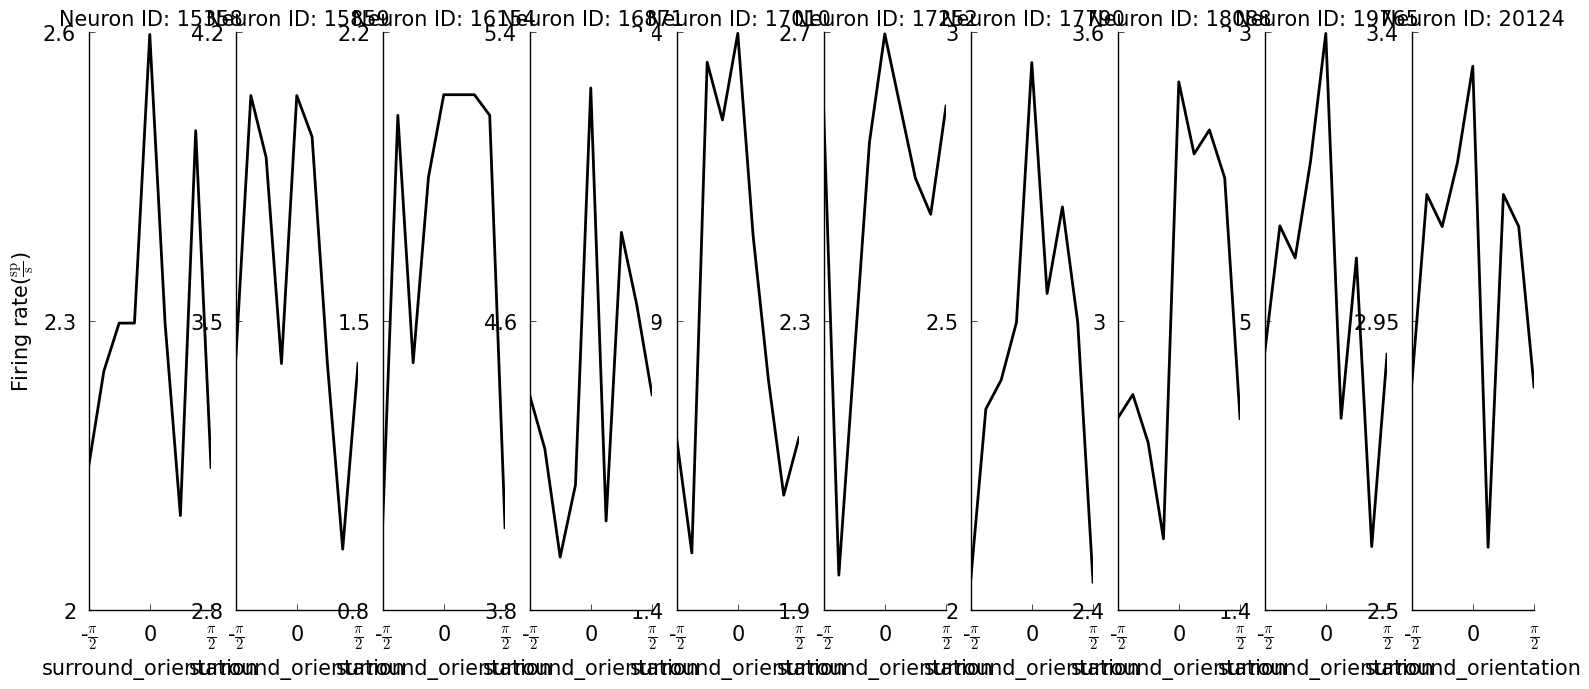

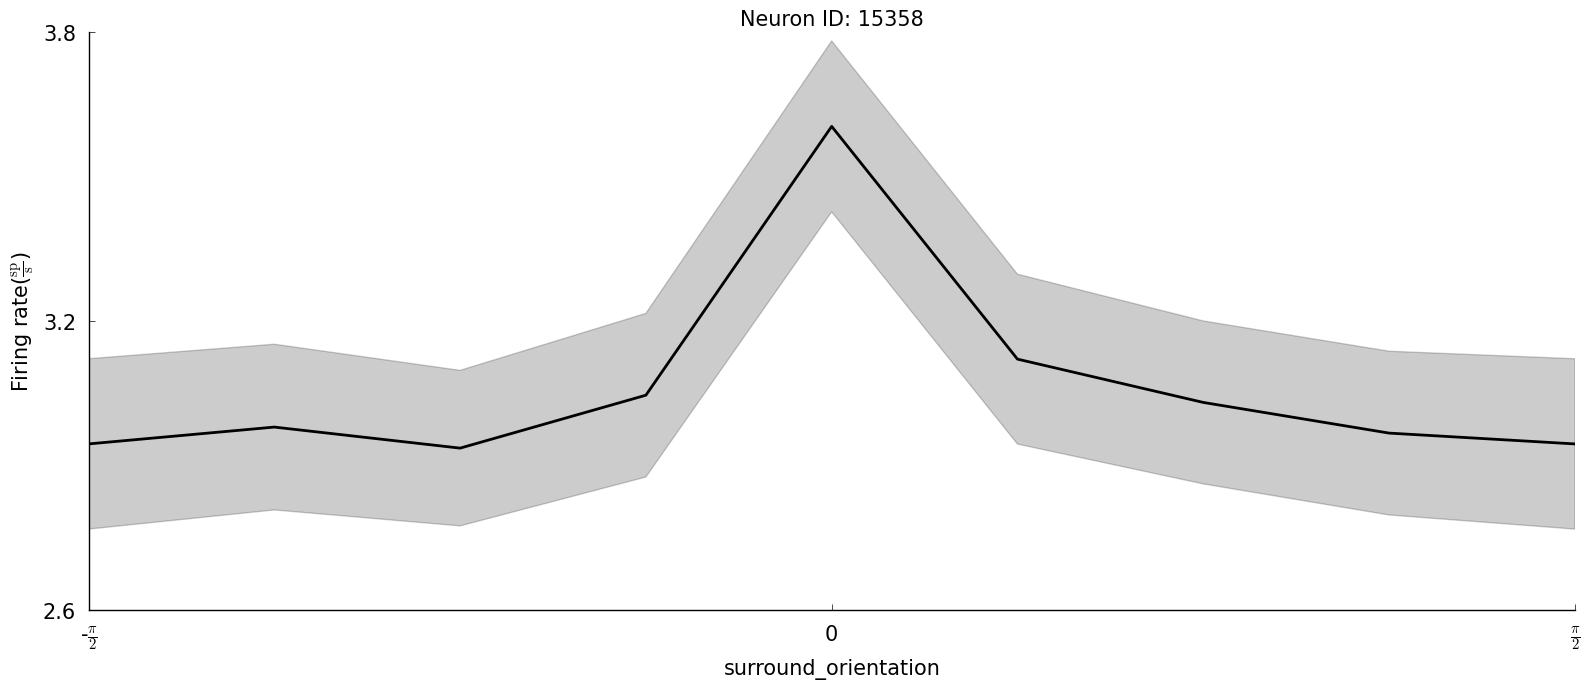

In [13]:
dsv = param_filter_query(data_store,st_name='DriftingSinusoidalGratingCenterSurroundStimulus',value_name='Firing rate')    
PlotTuningCurve(dsv,ParameterSet({'parameter_name' : 'surround_orientation', 'neurons': list(center4), 'sheet_name' : 'V1_Exc_L4','centered'  : False,'mean' : False, 'polar' : False, 'pool'  : False}),plot_file_name='OCTCExcL4M.png',fig_param={'dpi' : 100,'figsize': (16,7)}).plot()
dsv = param_filter_query(data_store,st_name='DriftingSinusoidalGratingCenterSurroundStimulus',value_name='Firing rate')    
PlotTuningCurve(dsv,ParameterSet({'parameter_name' : 'surround_orientation', 'neurons': list(center4), 'sheet_name' : 'V1_Exc_L4','centered'  : False,'mean' : True, 'polar' : False, 'pool'  : False}),plot_file_name='OCTCExcL4M.png',fig_param={'dpi' : 100,'figsize': (16,7)}).plot()

  {'linestyles': None, 'y_label': None, 'labels': None, 'y_tick_labels': None, 'colors': None, 'y_lim': None, 'linewidth': 1, 'x_scale': 'linear', 'fill': False, 'y_ticks': None, 'title': None, 'x_label': None, 'x_axis': True, 'y_label_pad': None, 'x_label_pad': None, 'bottom_border': True, 'y_tick_style': 'Min', 'left_border': True, 'top_right_border': False, 'grid': False, 'fontsize': 15, 'x_tick_labels': None, 'legend': False, 'x_scale_base': None, 'y_tick_pad': 10, 'y_scale': 'linear', 'x_tick_style': 'Min', 'x_ticks': None, 'x_tick_pad': 10, 'y_scale_base': None, 'y_axis': True, 'x_lim': None, 'mean': False}
  {'linestyles': None, 'y_label': None, 'labels': None, 'y_tick_labels': None, 'colors': None, 'y_lim': None, 'linewidth': 1, 'x_scale': 'linear', 'fill': False, 'y_ticks': None, 'title': None, 'x_label': None, 'x_axis': True, 'y_label_pad': None, 'x_label_pad': None, 'bottom_border': True, 'y_tick_style': 'Min', 'left_border': True, 'top_right_border': False, 'grid': False, '

  {'linestyles': None, 'y_label': None, 'labels': None, 'y_tick_labels': None, 'colors': None, 'y_lim': None, 'linewidth': 1, 'x_scale': 'linear', 'fill': False, 'y_ticks': None, 'title': None, 'x_label': None, 'x_axis': True, 'y_label_pad': None, 'x_label_pad': None, 'bottom_border': True, 'y_tick_style': 'Min', 'left_border': True, 'top_right_border': False, 'grid': False, 'fontsize': 15, 'x_tick_labels': None, 'legend': False, 'x_scale_base': None, 'y_tick_pad': 10, 'y_scale': 'linear', 'x_tick_style': 'Min', 'x_ticks': None, 'x_tick_pad': 10, 'y_scale_base': None, 'y_axis': True, 'x_lim': None, 'mean': False}
  {'linestyles': None, 'y_label': None, 'labels': None, 'y_tick_labels': None, 'colors': None, 'y_lim': None, 'linewidth': 1, 'x_scale': 'linear', 'fill': False, 'y_ticks': None, 'title': None, 'x_label': None, 'x_axis': True, 'y_label_pad': None, 'x_label_pad': None, 'bottom_border': True, 'y_tick_style': 'Min', 'left_border': True, 'top_right_border': False, 'grid': False, '

ValueError: max() arg is an empty sequence

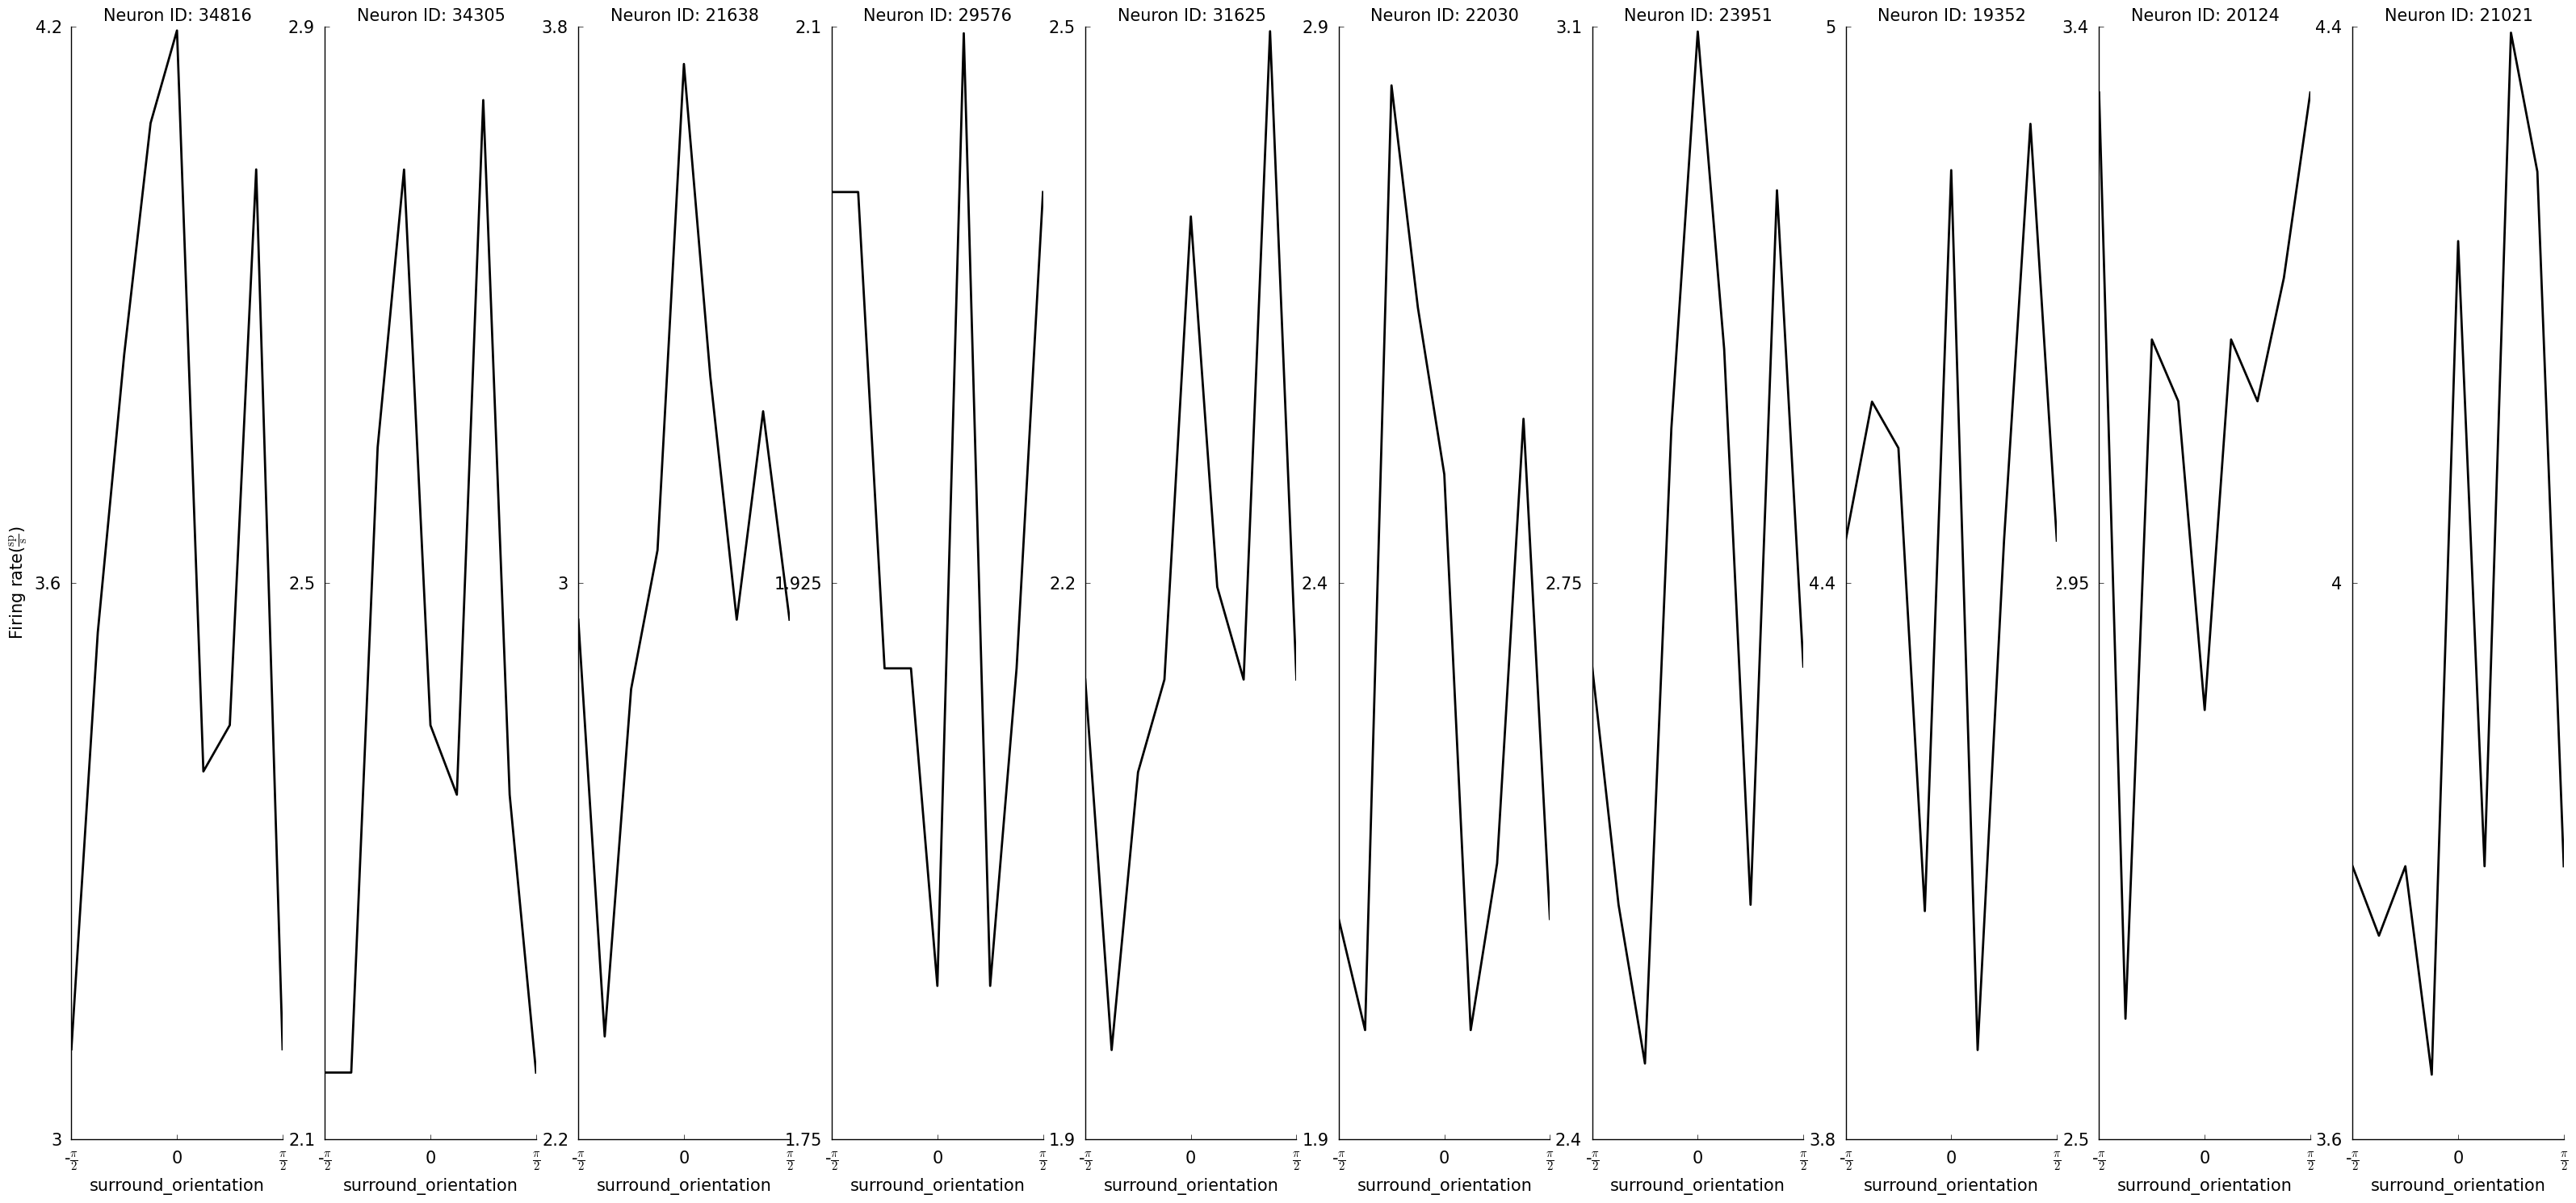

In [9]:
dsv = param_filter_query(data_store,st_name='DriftingSinusoidalGratingCenterSurroundStimulus',value_name='Firing rate')    
PlotTuningCurve(dsv,ParameterSet({'parameter_name' : 'surround_orientation', 'neurons': list(analog_center4), 'sheet_name' : 'V1_Exc_L4','centered'  : False,'mean' : False, 'polar' : False, 'pool'  : False}),fig_param={'dpi' : 100,'figsize': (32,15)}).plot()


dsv = param_filter_query(data_store,st_name='DriftingSinusoidalGratingCenterSurroundStimulus',value_name='-(x+y)(F0_Vm,Mean(VM))')    
PlotTuningCurve(dsv,ParameterSet({'parameter_name' : 'surround_orientation', 'neurons': list(analog_center4), 'sheet_name' : 'V1_Exc_L4','centered'  : False,'mean' : False, 'polar' : False, 'pool'  : False}),fig_param={'dpi' : 100,'figsize': (32,15)}).plot()



In [14]:
import lsv1m_paper
reload(lsv1m_paper)
lsv1m_paper.OCTCTuningOverview(data_store,ParameterSet({'l4_neurons' : list(analog_center4),'l23_neurons' : list(analog_center23),'l4_neurons_analog' : list(analog_center4),'l23_neurons_analog' : list(analog_center23)}),fig_param={'dpi' : 300,'figsize': (18,8)}).plot()

IndexError: list index out of range

PlotTuningCurve plotting took: 0.0877459049225seconds
PlotTuningCurve plotting took: 0.0877459049225seconds
PlotTuningCurve plotting took: 0.0875768661499seconds
PlotTuningCurve plotting took: 0.0875768661499seconds


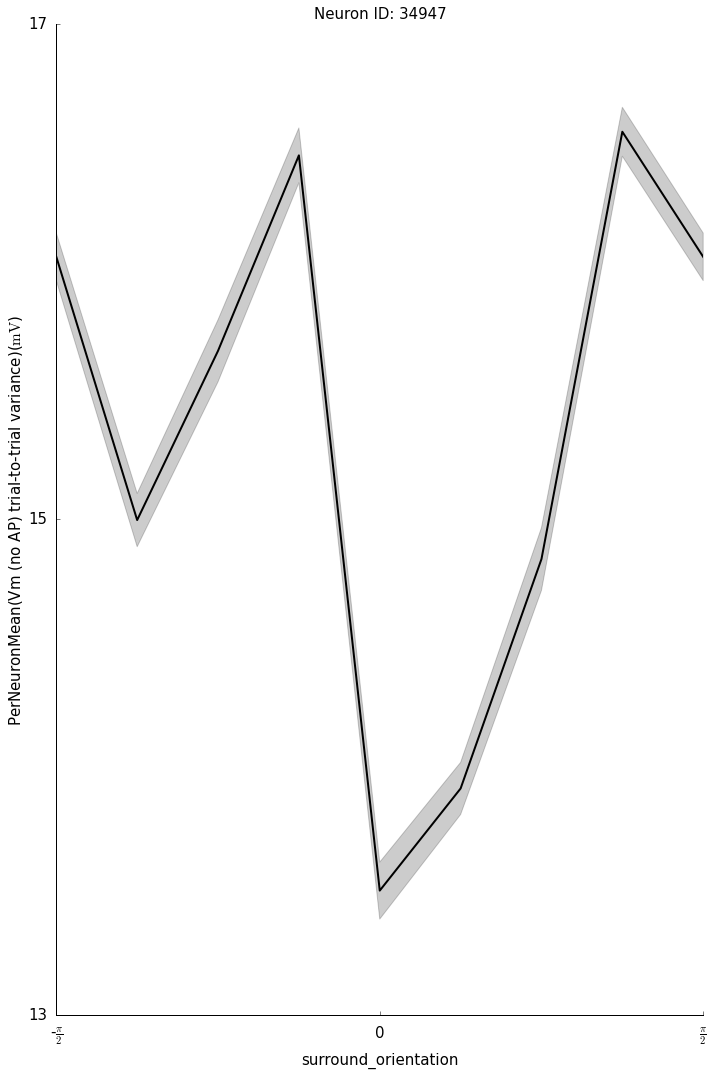

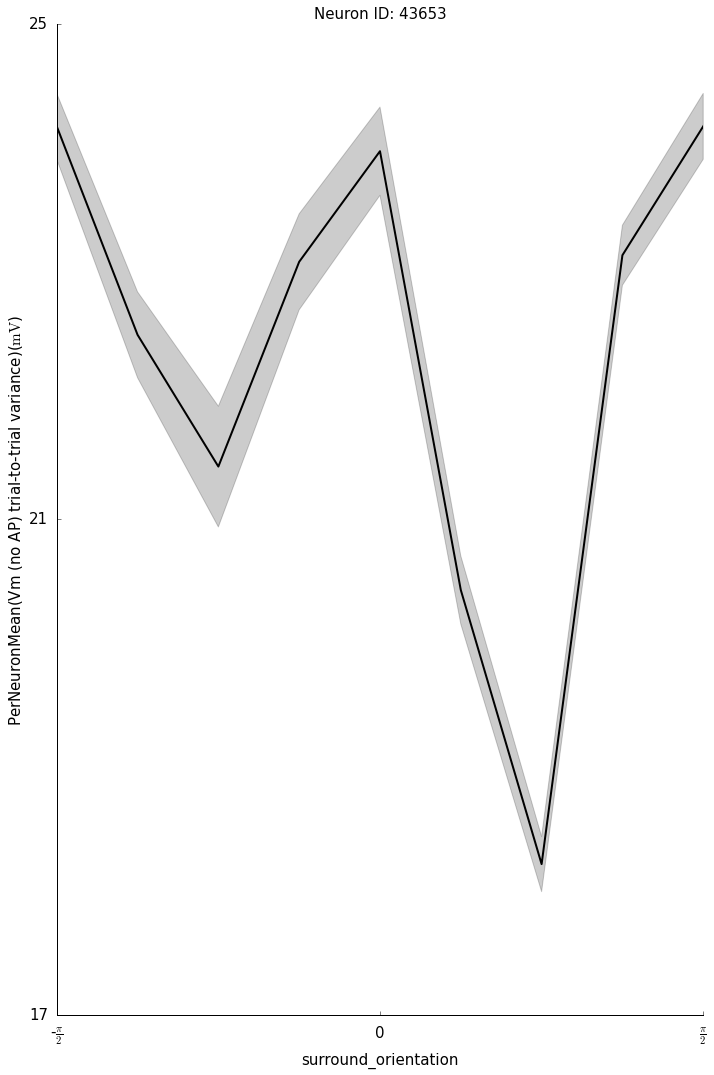

In [27]:
dsv = param_filter_query(data_store,st_name='DriftingSinusoidalGratingCenterSurroundStimulus',analysis_algorithm='AnalogSignal_PerNeuronMeanVar',value_name='PerNeuronMean(Vm (no AP) trial-to-trial variance)')    
PlotTuningCurve(dsv,ParameterSet({'parameter_name' : 'surround_orientation', 'neurons': list(analog_center4), 'sheet_name' : 'V1_Exc_L4','centered'  : False,'mean' : True, 'polar' : False, 'pool'  : False}),fig_param={'dpi' : 100,'figsize': (10,15)}).plot()
dsv = param_filter_query(data_store,st_name='DriftingSinusoidalGratingCenterSurroundStimulus',analysis_algorithm='AnalogSignal_PerNeuronMeanVar',value_name='PerNeuronMean(Vm (no AP) trial-to-trial variance)')    
PlotTuningCurve(dsv,ParameterSet({'parameter_name' : 'surround_orientation', 'neurons': list(analog_center23), 'sheet_name' : 'V1_Exc_L2/3','centered'  : False,'mean' : True, 'polar' : False, 'pool'  : False}),fig_param={'dpi' : 100,'figsize': (10,15)}).plot()

In [28]:
len(analog_center4)

37

In [29]:
dsv = param_filter_query(data_store,st_name='DriftingSinusoidalGratingCenterSurroundStimulus',analysis_algorithm='AnalogSignal_PerNeuronMeanVar',sheet_name=['V1_Exc_L4'])    

In [30]:
for a in dsv.get_analysis_result():
    print a.value_name

PerNeuronMean(Vm (no AP) trial-to-trial variance)
PerNeuronVar(Vm (no AP) trial-to-trial variance)
PerNeuronMean(Vm (no AP) trial-to-trial variance)
PerNeuronVar(vm trial-to-trial variance)
PerNeuronVar(vm trial-to-trial variance)
PerNeuronMean(vm trial-to-trial variance)
PerNeuronMean(vm trial-to-trial variance)
PerNeuronVar(vm trial-to-trial variance)
PerNeuronMean(vm trial-to-trial variance)
PerNeuronVar(vm trial-to-trial variance)
PerNeuronVar(vm trial-to-trial variance)
PerNeuronVar(vm trial-to-trial variance)
PerNeuronMean(vm trial-to-trial variance)
PerNeuronVar(Vm (no AP) trial-to-trial variance)
PerNeuronMean(Vm (no AP) trial-to-trial variance)
PerNeuronVar(Vm (no AP) trial-to-trial variance)
PerNeuronMean(vm trial-to-trial variance)
PerNeuronMean(vm trial-to-trial variance)
PerNeuronMean(vm trial-to-trial variance)
PerNeuronVar(Vm (no AP) trial-to-trial variance)
PerNeuronMean(Vm (no AP) trial-to-trial variance)
PerNeuronVar(vm trial-to-trial variance)
PerNeuronVar(Vm (no AP)

In [51]:
v = param_filter_query(data_store,value_name=['Suppression index of Firing rate'],sheet_name='V1_Exc_L4').get_analysis_result()[0].values
print len(v[v < 1.0])/(len(v)*1.0)
print len(v)
print v

0.565217391304
46
[  0.1120944    4.06944444   0.21645022   0.25641026   0.31095406
   1.17948718   8.96875      0.84         0.65142857   0.95238095
   0.55555556   0.24193548   0.69105691   3.44444444   1.19101124
  11.76190476   0.16923077   4.8          2.03797468   0.21453287
   1.5359116    0.63684211   2.13636364   1.63333333   0.69863014   1.44
   0.67015707   0.63551402   7.09090909   0.48704663   0.55555556
   0.8853211    0.77027027   0.67117117   5.77777778   0.65745856
   1.14583333   2.74242424   0.57364341   1.04166667   0.62068966
   0.28834356   7.65217391   1.2734375    1.66346154   0.94782609]


In [52]:
v = param_filter_query(data_store,value_name=['Suppression index of Firing rate'],sheet_name='V1_Exc_L2/3').get_analysis_result()[0].values
print len(v[v < 1.0])/(len(v)*1.0)
print len(v)
print v

0.565217391304
46
[ 1.13924051  2.80434783  0.52112676  0.69444444  0.55084746  0.33544304
  0.51041667  1.775       0.14285714  0.96923077  1.27586207  1.125       0.48
  2.07142857  1.30769231  1.03174603  1.42307692  0.89130435  0.44736842
  1.36206897  0.375       0.76923077  0.53424658  1.08333333  0.43010753
  0.27966102  0.44936709  1.15492958  0.84745763  2.4137931   1.33333333
  1.          0.65882353  0.57281553  2.525       1.52307692  0.4494382
  1.13541667  1.125       0.41414141  0.81818182  3.88235294  0.87037037
  1.12698413  0.61212121  0.65306122]
